## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# %matplotlib inline

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Basic Info

In [4]:
df.shape

(10841, 13)

In [5]:
df.info() ##Mostly Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.head(3)  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Review, Size, Installs, Price: can be numeric AS IT IS Object

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df[df.duplicated()].sort_values(by = 'App')

df[df['App'] == '10 Best Foods for You'] ## exact duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [9]:
##Duplicates Treatment
df1 = df.copy()
df1.drop_duplicates(inplace=True)

In [10]:
df.shape, df1.shape

((10841, 13), (10358, 13))

In [11]:
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [12]:
df.duplicated().sum(), df1.duplicated().sum()

(np.int64(483), np.int64(0))

# Column Conversions

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_seq_items", None)   # Show all array elements
pd.set_option("display.max_rows", None)       # Show all rows
pd.set_option("display.max_columns", None) 

In [80]:
df1['Reviews'].str.isnumeric().sum(), df1.shape ##one is non-numeric

AttributeError: Can only use .str accessor with string values!

In [ ]:
df1.reset_index(drop=True, inplace=True) ##we have drop duplicates after that resetting Index

In [ ]:
df1[~(df1['Reviews'].str.isnumeric())] ## row 10472 has M as well

df1.iat[9990,3] = '3000000' ###reassignment needeD

In [ ]:
df1['Reviews'] = df1['Reviews'].astype('int')

In [ ]:
import re

In [ ]:
##Size Column
df1['Size'].unique()
##there are few millioms few Thousands ||'Varies with device'
# df1['Size'].isnull().sum() #Non-null
def extract_unit(x):
    gt = re.search(r"[A-Za-z/s]+", x)

    try:
        gt.group()
    except:
        return None
    else:
        return gt.group()

#     if x is None
# import re
# # re.search("[A-Za-z]", df1['Size'])
# df1['Size'].str.extract(r'([A-Z])+')

In [ ]:
extract_unit(df1.at[1,'Size'])

'M'

In [ ]:
df1['Size'].apply(func= lambda x: extract_unit(x)).value_counts(), f"None {10358 -df1['Size'].apply(func= lambda x: extract_unit(x)).value_counts().sum()}"
##Either has No Unit, M, k, Ora string

(Size
 M         8516
 Varies    1526
 k          315
 Name: count, dtype: int64,
 'None 1')

In [ ]:
df1[df1['Size'].apply(func= lambda x: extract_unit(x)).isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
pt = re.compile(r"[0-9.]+")
hh = re.search(pt, "48.421hgs")
float(hh.group())

48.421

In [ ]:
def unit_conversion(x):
    gt = re.search(r"[A-Za-z/s]+", x)

    kind = ""

    try:
        gt.group()
    except:
        kind = None
    else:
        kind = gt.group()


    if x == 'Varies with device' or kind is None:
        return np.nan
    elif kind == "M":
        pt = re.compile(r"[0-9.]+")
        val = re.search(pt, x)
        return float(val.group())*1000000
    elif kind == "k":
        pt = re.compile(r"[0-9.]+")
        val = re.search(pt, x)
        return float(val.group())*1000
    else:
        return np.nan
    



In [ ]:
#For now with varies kept it none
df1['Size'] =df1['Size'].apply(func= lambda x: unit_conversion(x))
# df1['Size'].apply(func= lambda x: unit_conversion(x)).iat[9990]
# df1['Size'].apply(func= lambda x: unit_conversion(x)).iat[37]
# df1[df1['Size'] ==  'Varies with device' ] ##37,42

In [ ]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
df1['Installs'].str.replace(r"[+,]","", regex=True).unique()
df1['Installs'] = df1['Installs'].str.replace(r"[+,]","", regex=True).str.replace('Free','0').astype(int)

In [ ]:
df1.head()
df1.info()
df1['Price'] = df1['Price'].str.replace('Everyone','0').str.replace(r'$','').astype(float)

df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
##DATE ADJUSTMENT
df1[df1['Last Updated'] == "1.0.19"]
df1.iat[9990,-3] = df1.iat[9990,-4]
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])
# df1

In [ ]:
df1['Year'] = df1['Last Updated'].dt.year
df1['Month'] = df1['Last Updated'].dt.month
df1['day'] = df1['Last Updated'].dt.day

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20


## EDA


In [ ]:
##duplicate by App
df1[df1.duplicated('App')].shape

(698, 16)

In [ ]:
##duplicate by App
df1[df1.duplicated('App')].head()
# df1[df1['App'] == "Quick PDF Scanner + OCR FREE"] ##Review diff
# df1[df1['App'] == "OfficeSuite : Free Office + PDF Editor"]
df1[df1.duplicated('App')].head() #.shape
df2 = df1[df1.duplicated('App')].groupby(['App'], as_index= False).\
    agg({'Reviews':['max','min']})

df2.columns = [i+"_"+j for i, j in df2.columns]

In [ ]:
df2['flg'] = df2.apply(lambda x: x['Reviews_max'] == x['Reviews_min'], axis = 1)

In [ ]:
df3 = df2[~df2['flg']].iloc[:,[0,1]].rename(columns={'App_':'App'})

df1 = pd.merge(df1, df3, how = 'left',on = "App")


#['flg'].value_counts()

In [ ]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,day,Reviews_max
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15,NaN


In [ ]:
##Where duplicacy is due to Review replace with max_review
df1[~df1['Reviews_max'].isnull()].head()
df1[df1['App'] == "Google Chrome: Fast & Secure"]
df1['Reviews_ne'] = df1.apply(lambda x: x['Reviews'] if pd.isna(x['Reviews_max'] )  else  x['Reviews_max'], axis =1)#9643041.0

In [ ]:
df1['Reviews_ne'].isnull().any()
# pd.isna(df1['Reviews_ne']).any()
df1['Reviews'] = df1['Reviews_ne']
df1.drop(labels= 'Reviews_ne', axis =1,inplace=True)

In [ ]:
df1['Reviews_max'].dtype

dtype('float64')

In [ ]:
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,day,Reviews_max
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1,NaN


In [ ]:
df1[df1.duplicated()].shape

df_f = df1.drop_duplicates()

In [ ]:
##Any App duplicacy removed as that are different reasons which can't be hardcode
df_f.drop_duplicates(subset= 'App', keep = 'first', inplace=True)

In [ ]:
df_f[df_f.duplicated('App')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,day,Reviews_max


In [ ]:
df_f.drop(['Reviews_max'],inplace=True, axis = 1)

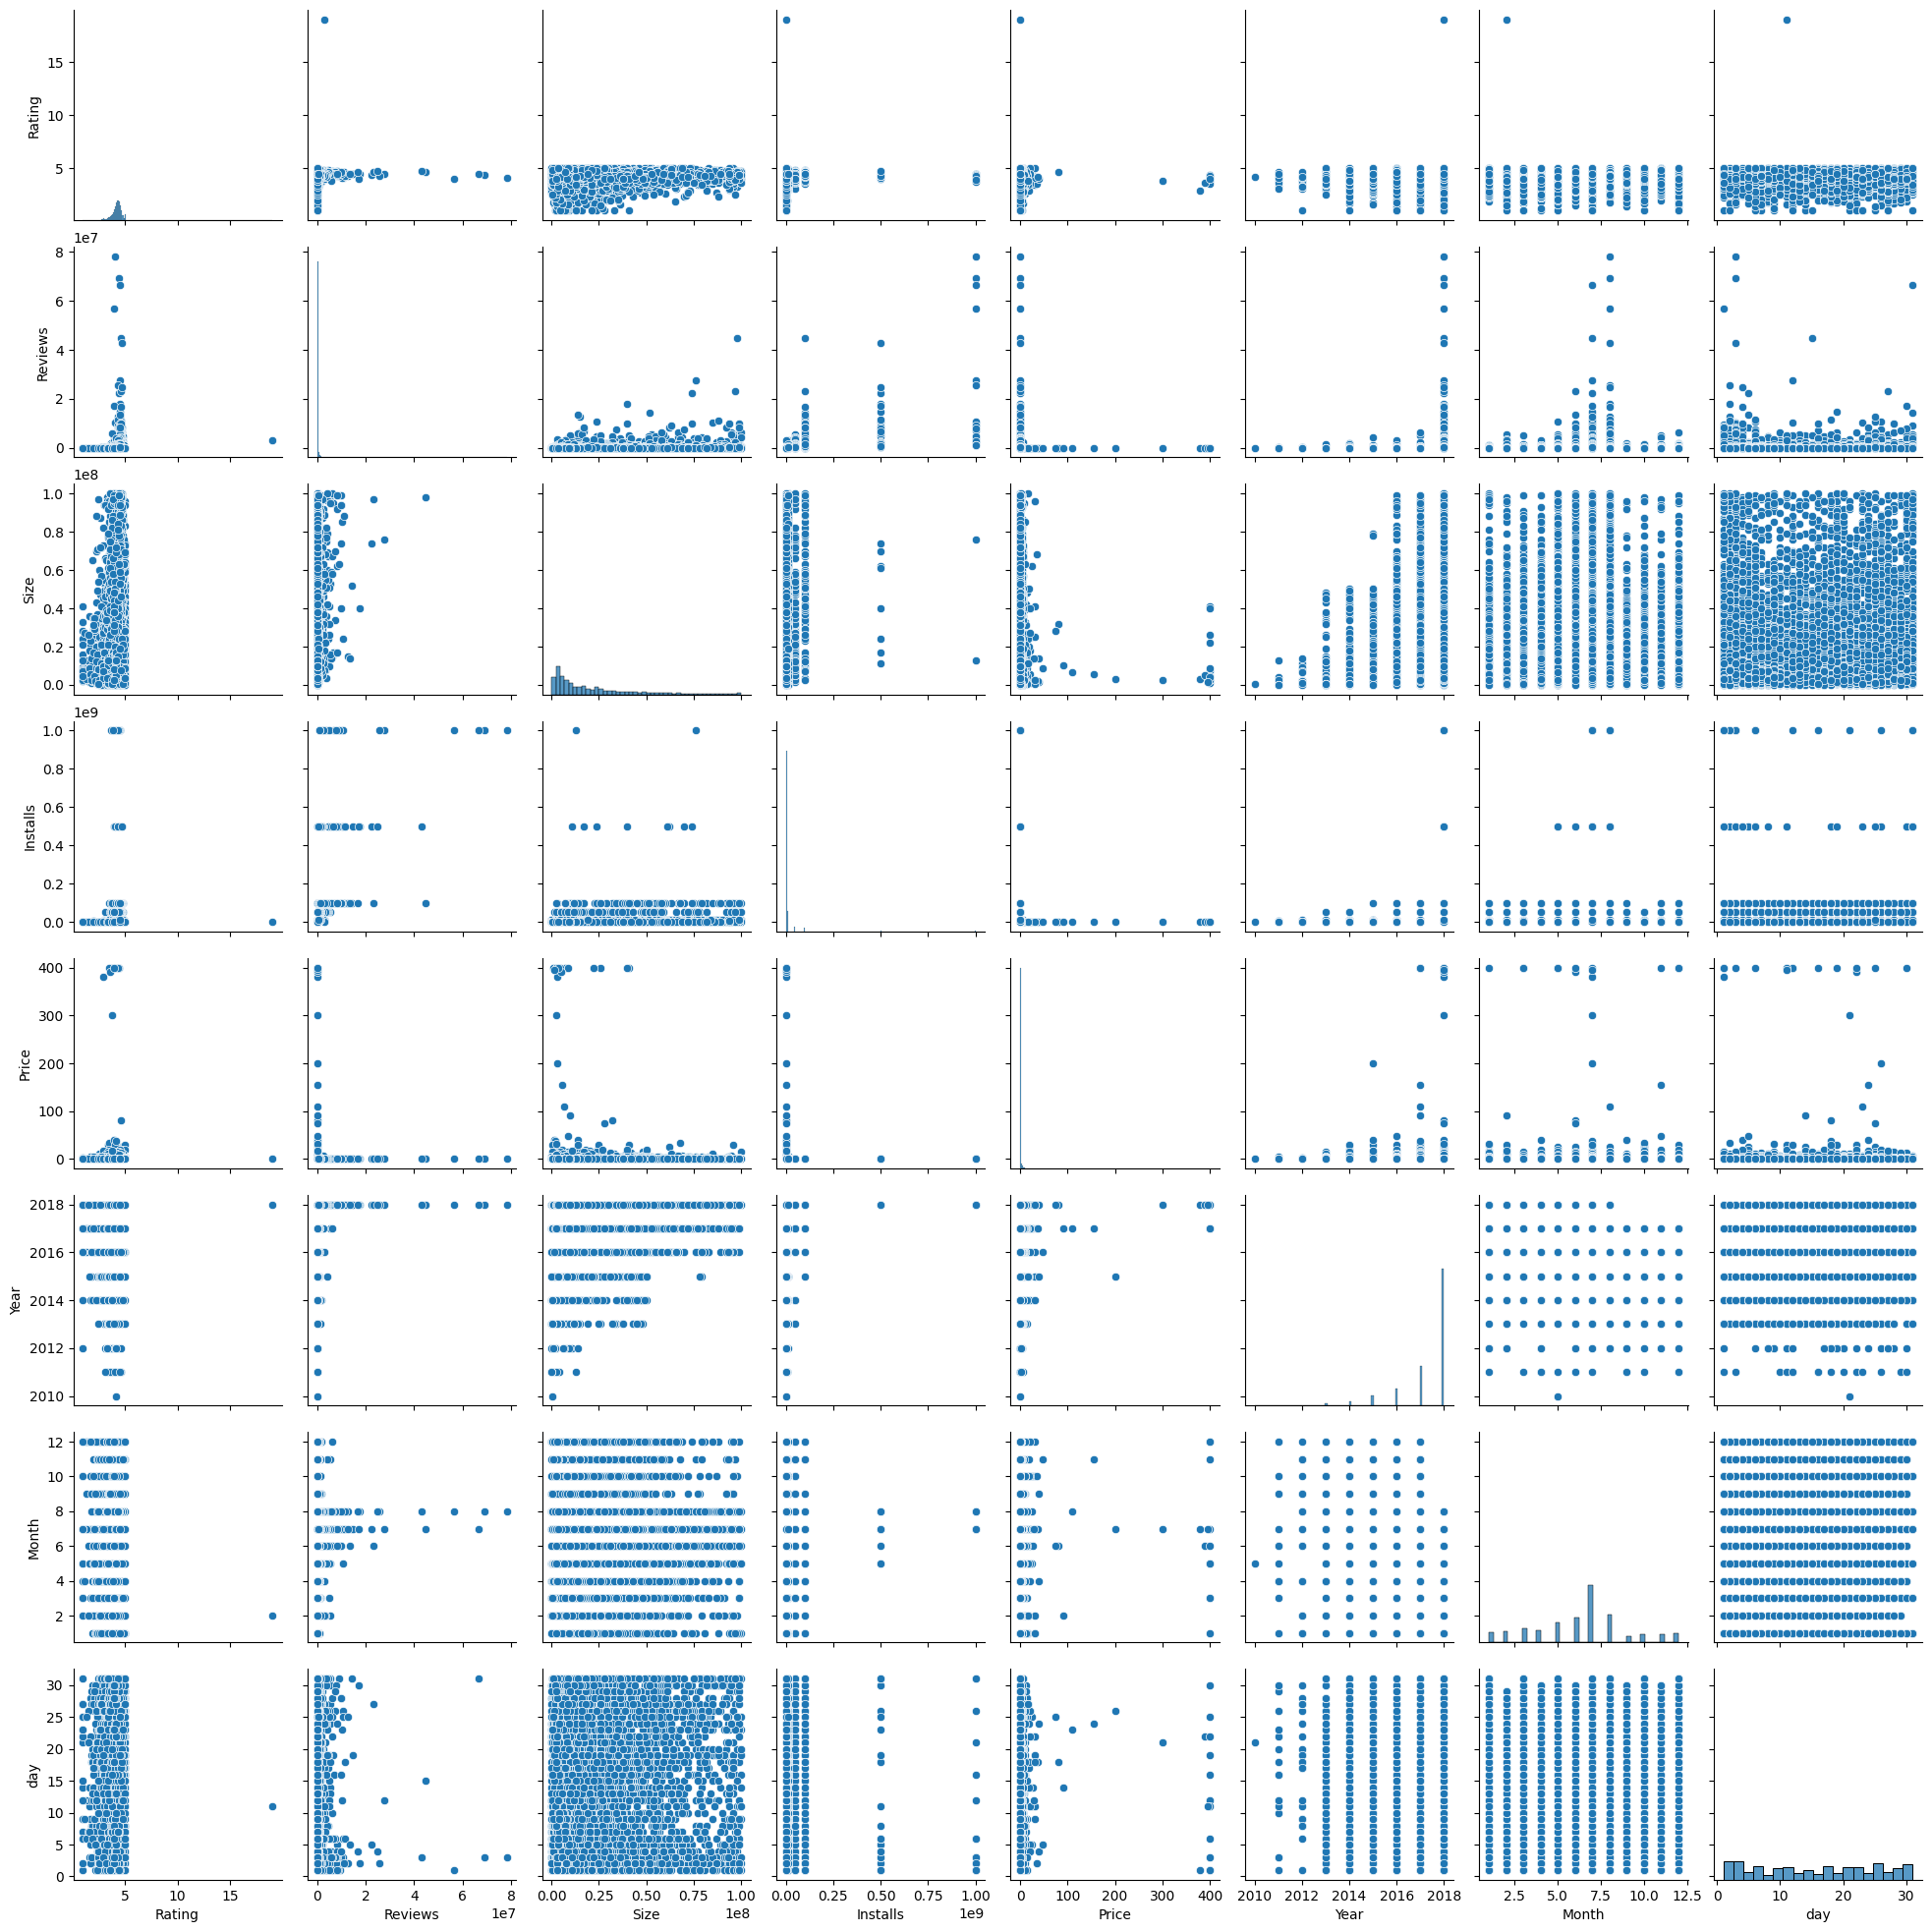

In [ ]:
sns.pairplot(df_f) ##Unable to give much Info

In [ ]:
cat = [i for i in df_f.columns if df_f[i].dtype == 'O']
num = [i for i in df_f.columns if df_f[i].dtype in ['int32','float']]

print(f'We have {len(num)} numerical features : {num}')
print(f'\nWe have {len(cat)} categorical features : {cat}')
df_f.shape


We have 7 numerical features : ['Rating', 'Reviews', 'Size', 'Price', 'Year', 'Month', 'day']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


(9660, 16)

In [ ]:
df_f.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Year                       int32
Month                      int32
day                        int32
dtype: object

In [ ]:
df_f[num].tail()

,Rating,Reviews,Size,Price,Year,Month,day
10353,4.5,38.0,53000000.0,0.0,2017,7,25
10354,5.0,4.0,3600000.0,0.0,2018,7,6
10355,NaN,3.0,9500000.0,0.0,2017,1,20
10356,4.5,114.0,NaN,0.0,2015,1,19
10357,4.5,398307.0,19000000.0,0.0,2018,7,25


<Figure size 640x480 with 0 Axes>

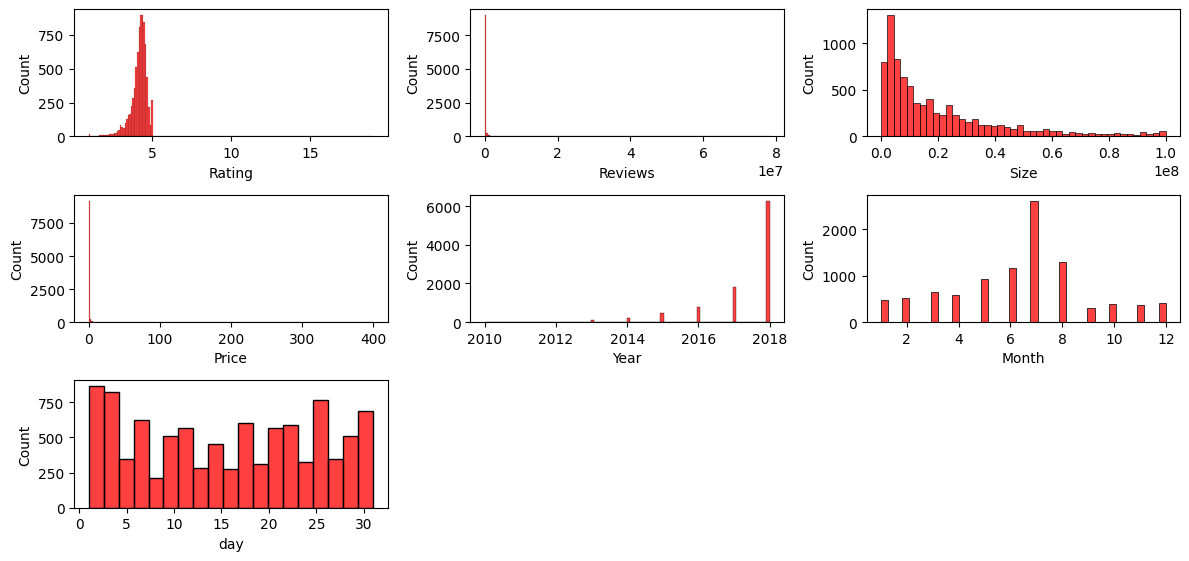

In [ ]:
##Pictorial Representation
# plt.Figure(figsize= (10,5))
plt.clf()
plt.figure(figsize= (12,9))
for i in range(0, len(num)):
    
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df_f[num[i]], color='r')
    plt.xlabel(num[i])
    plt.tight_layout()

##rating, Year: left skewed rest other than month right skewed

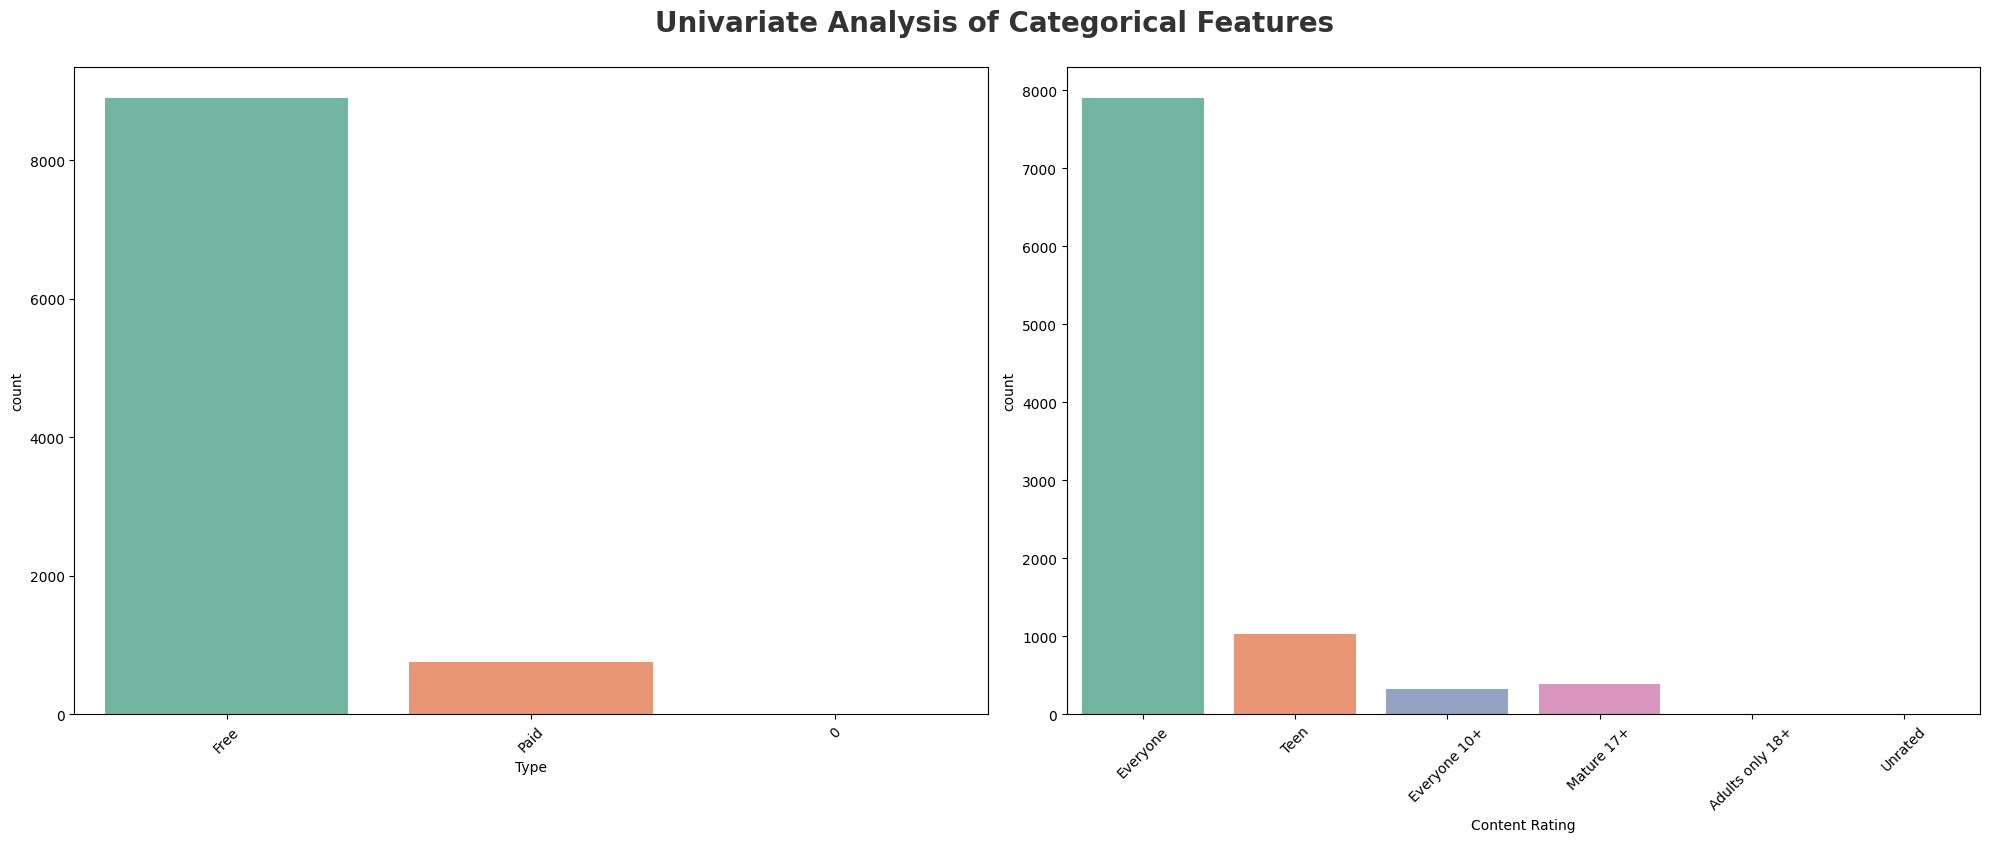

In [ ]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']

for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_f[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [ ]:
df_f['Category'].value_counts()[0:10]

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

<Axes: ylabel='count'>

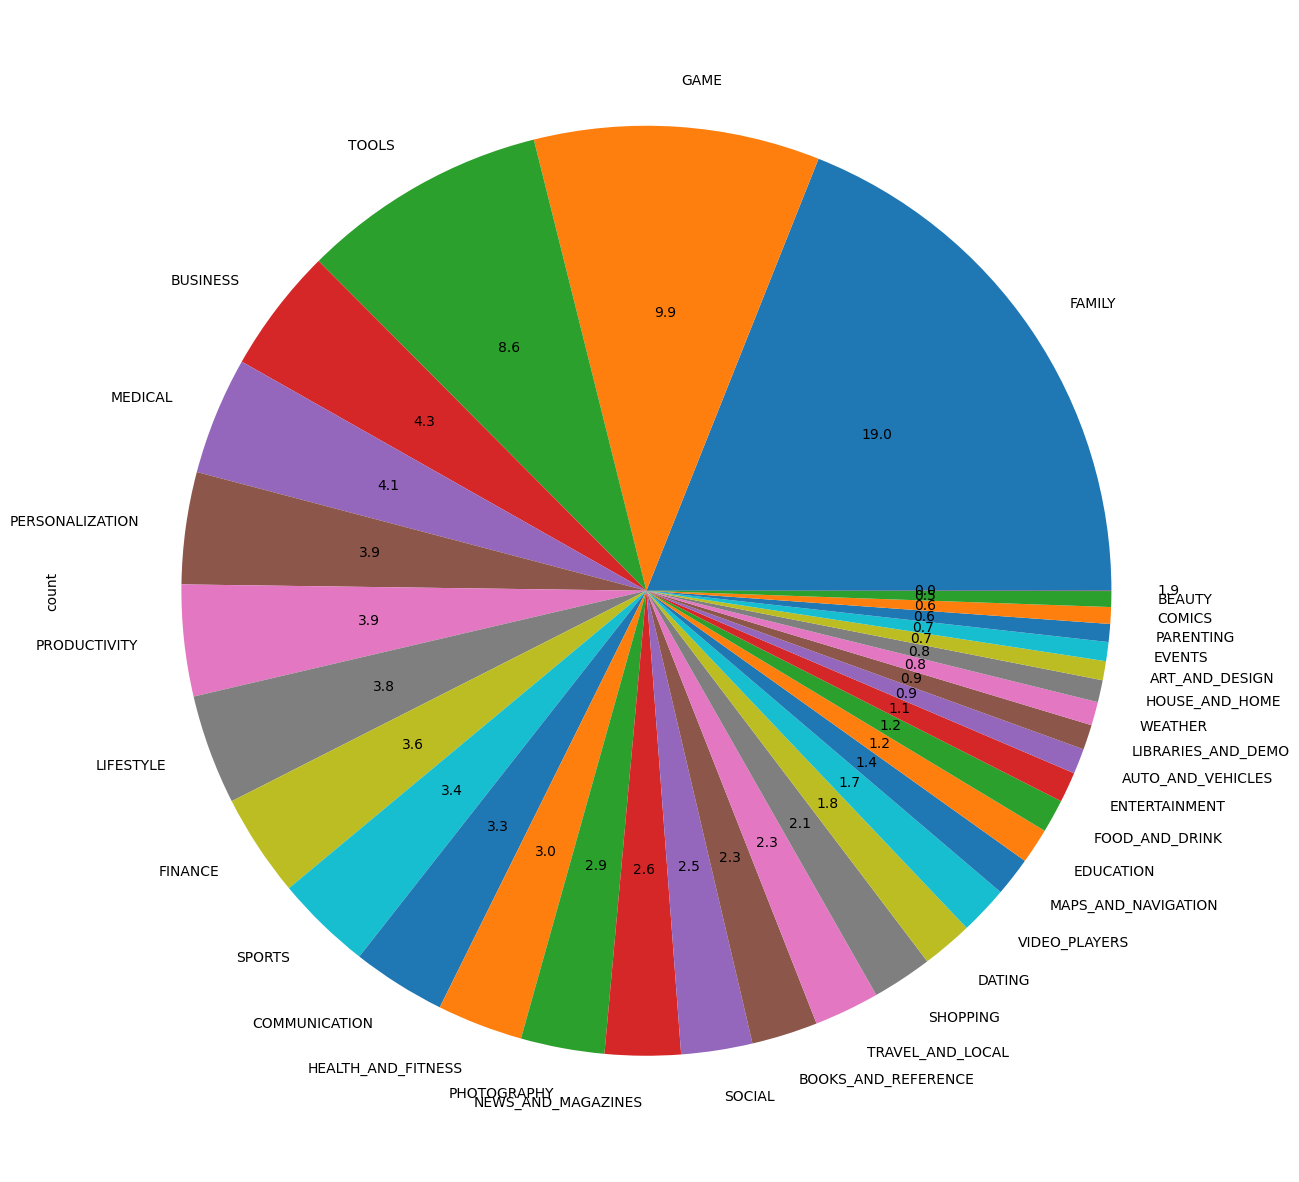

In [ ]:
df_f['Category'].value_counts().plot.pie(y=df_f['Category'],figsize=(15,16),autopct='%1.1f')

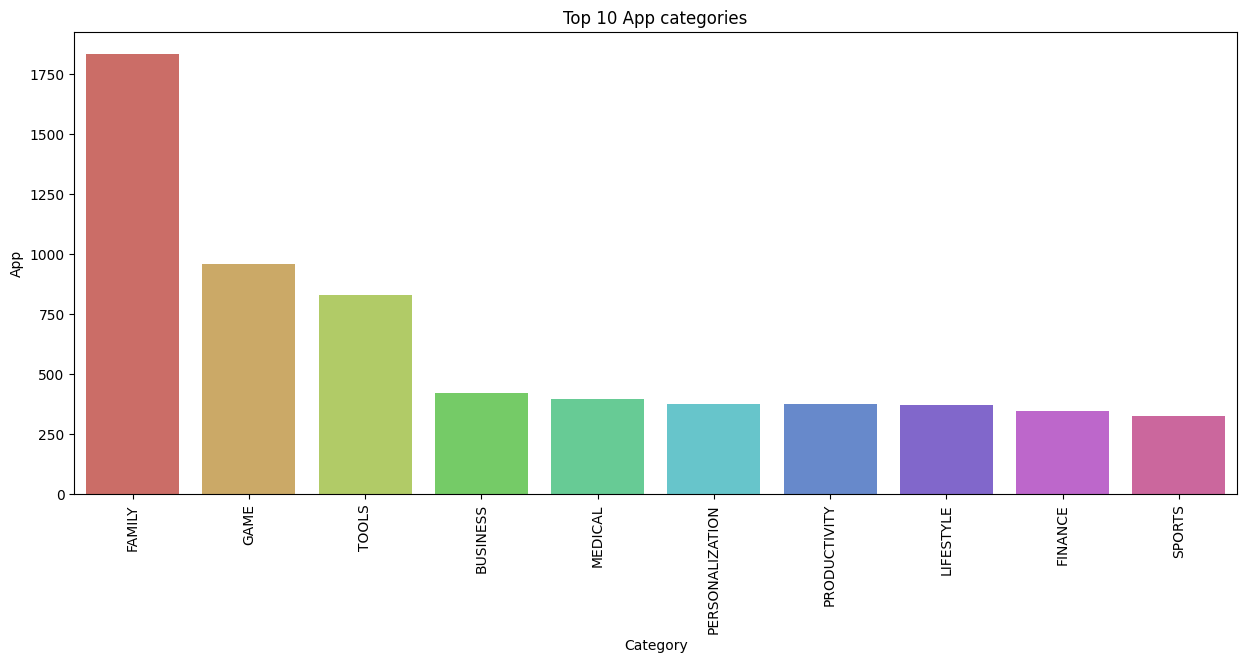

In [ ]:
## top 10 app
cat1 = pd.DataFrame(df_f.groupby(['Category'])['App'].count().nlargest(10)).reset_index()
cat1
plt.figure(figsize=(15,6))
sns.barplot(x=cat1['Category'], y ='App',data = cat1,palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

In [93]:
installn = pd.DataFrame((df_f.groupby(['Category'])['Installs'].sum()\
                         .sort_values(ascending=False)/1000000000)[0:10])\
                            .reset_index() ##converting to billion
installn

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


0             GAME
1    COMMUNICATION
2            TOOLS
3     PRODUCTIVITY
4           SOCIAL
Name: Category, dtype: object

<Axes: xlabel='Installs', ylabel='Category'>

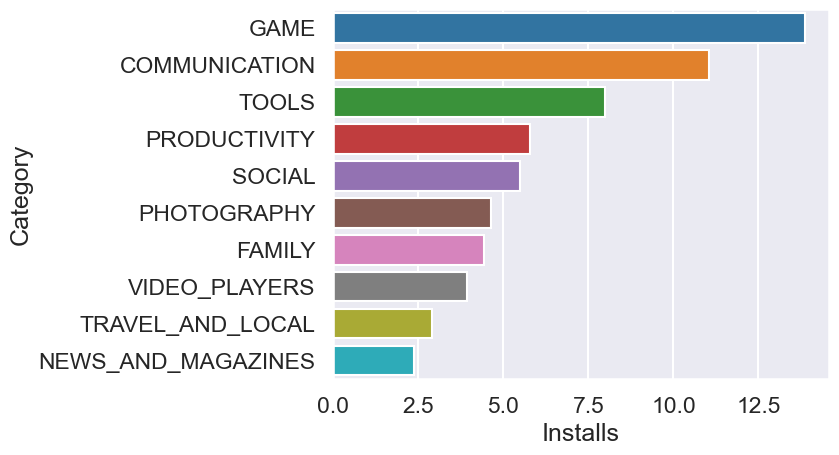

In [100]:
sns.set_style("darkgrid")
sns.set_context("talk")
sns.barplot(data = installn,y= 'Category', x= 'Installs', palette= 'tab10')

## What are the Top 5 most installed Apps in Each popular Categories ??

In [104]:
pd.set_option("display.float_format", "{:.2f}".format) 

In [123]:
app_installn = pd.DataFrame((df_f.groupby(['Category','App'])['Installs'].sum()\
                         .sort_values(ascending=False)/1000000000))\
                            .reset_index() ##converting to billion
app_installn['rnk'] =app_installn.groupby(['Category'])['Installs'].rank(method='first',ascending=False)
app_installn1 = app_installn.loc[(app_installn['Category'].\
                                  isin(list(installn['Category'][:5]))) & (app_installn['rnk'] <6),:].sort_values(by= ['Category','rnk'])


In [124]:
app_installn1.head(2)

,Category,App,Installs,rnk
4,COMMUNICATION,Messenger – Text and Video Chat for Free,1.00,1.00
5,COMMUNICATION,WhatsApp Messenger,1.00,2.00


In [129]:
app_installn1['Category'].unique()

array(['COMMUNICATION', 'GAME', 'PRODUCTIVITY', 'SOCIAL', 'TOOLS'],
      dtype=object)

In [135]:
installn['Category']

0                  GAME
1         COMMUNICATION
2                 TOOLS
3          PRODUCTIVITY
4                SOCIAL
5           PHOTOGRAPHY
6                FAMILY
7         VIDEO_PLAYERS
8      TRAVEL_AND_LOCAL
9    NEWS_AND_MAGAZINES
Name: Category, dtype: object

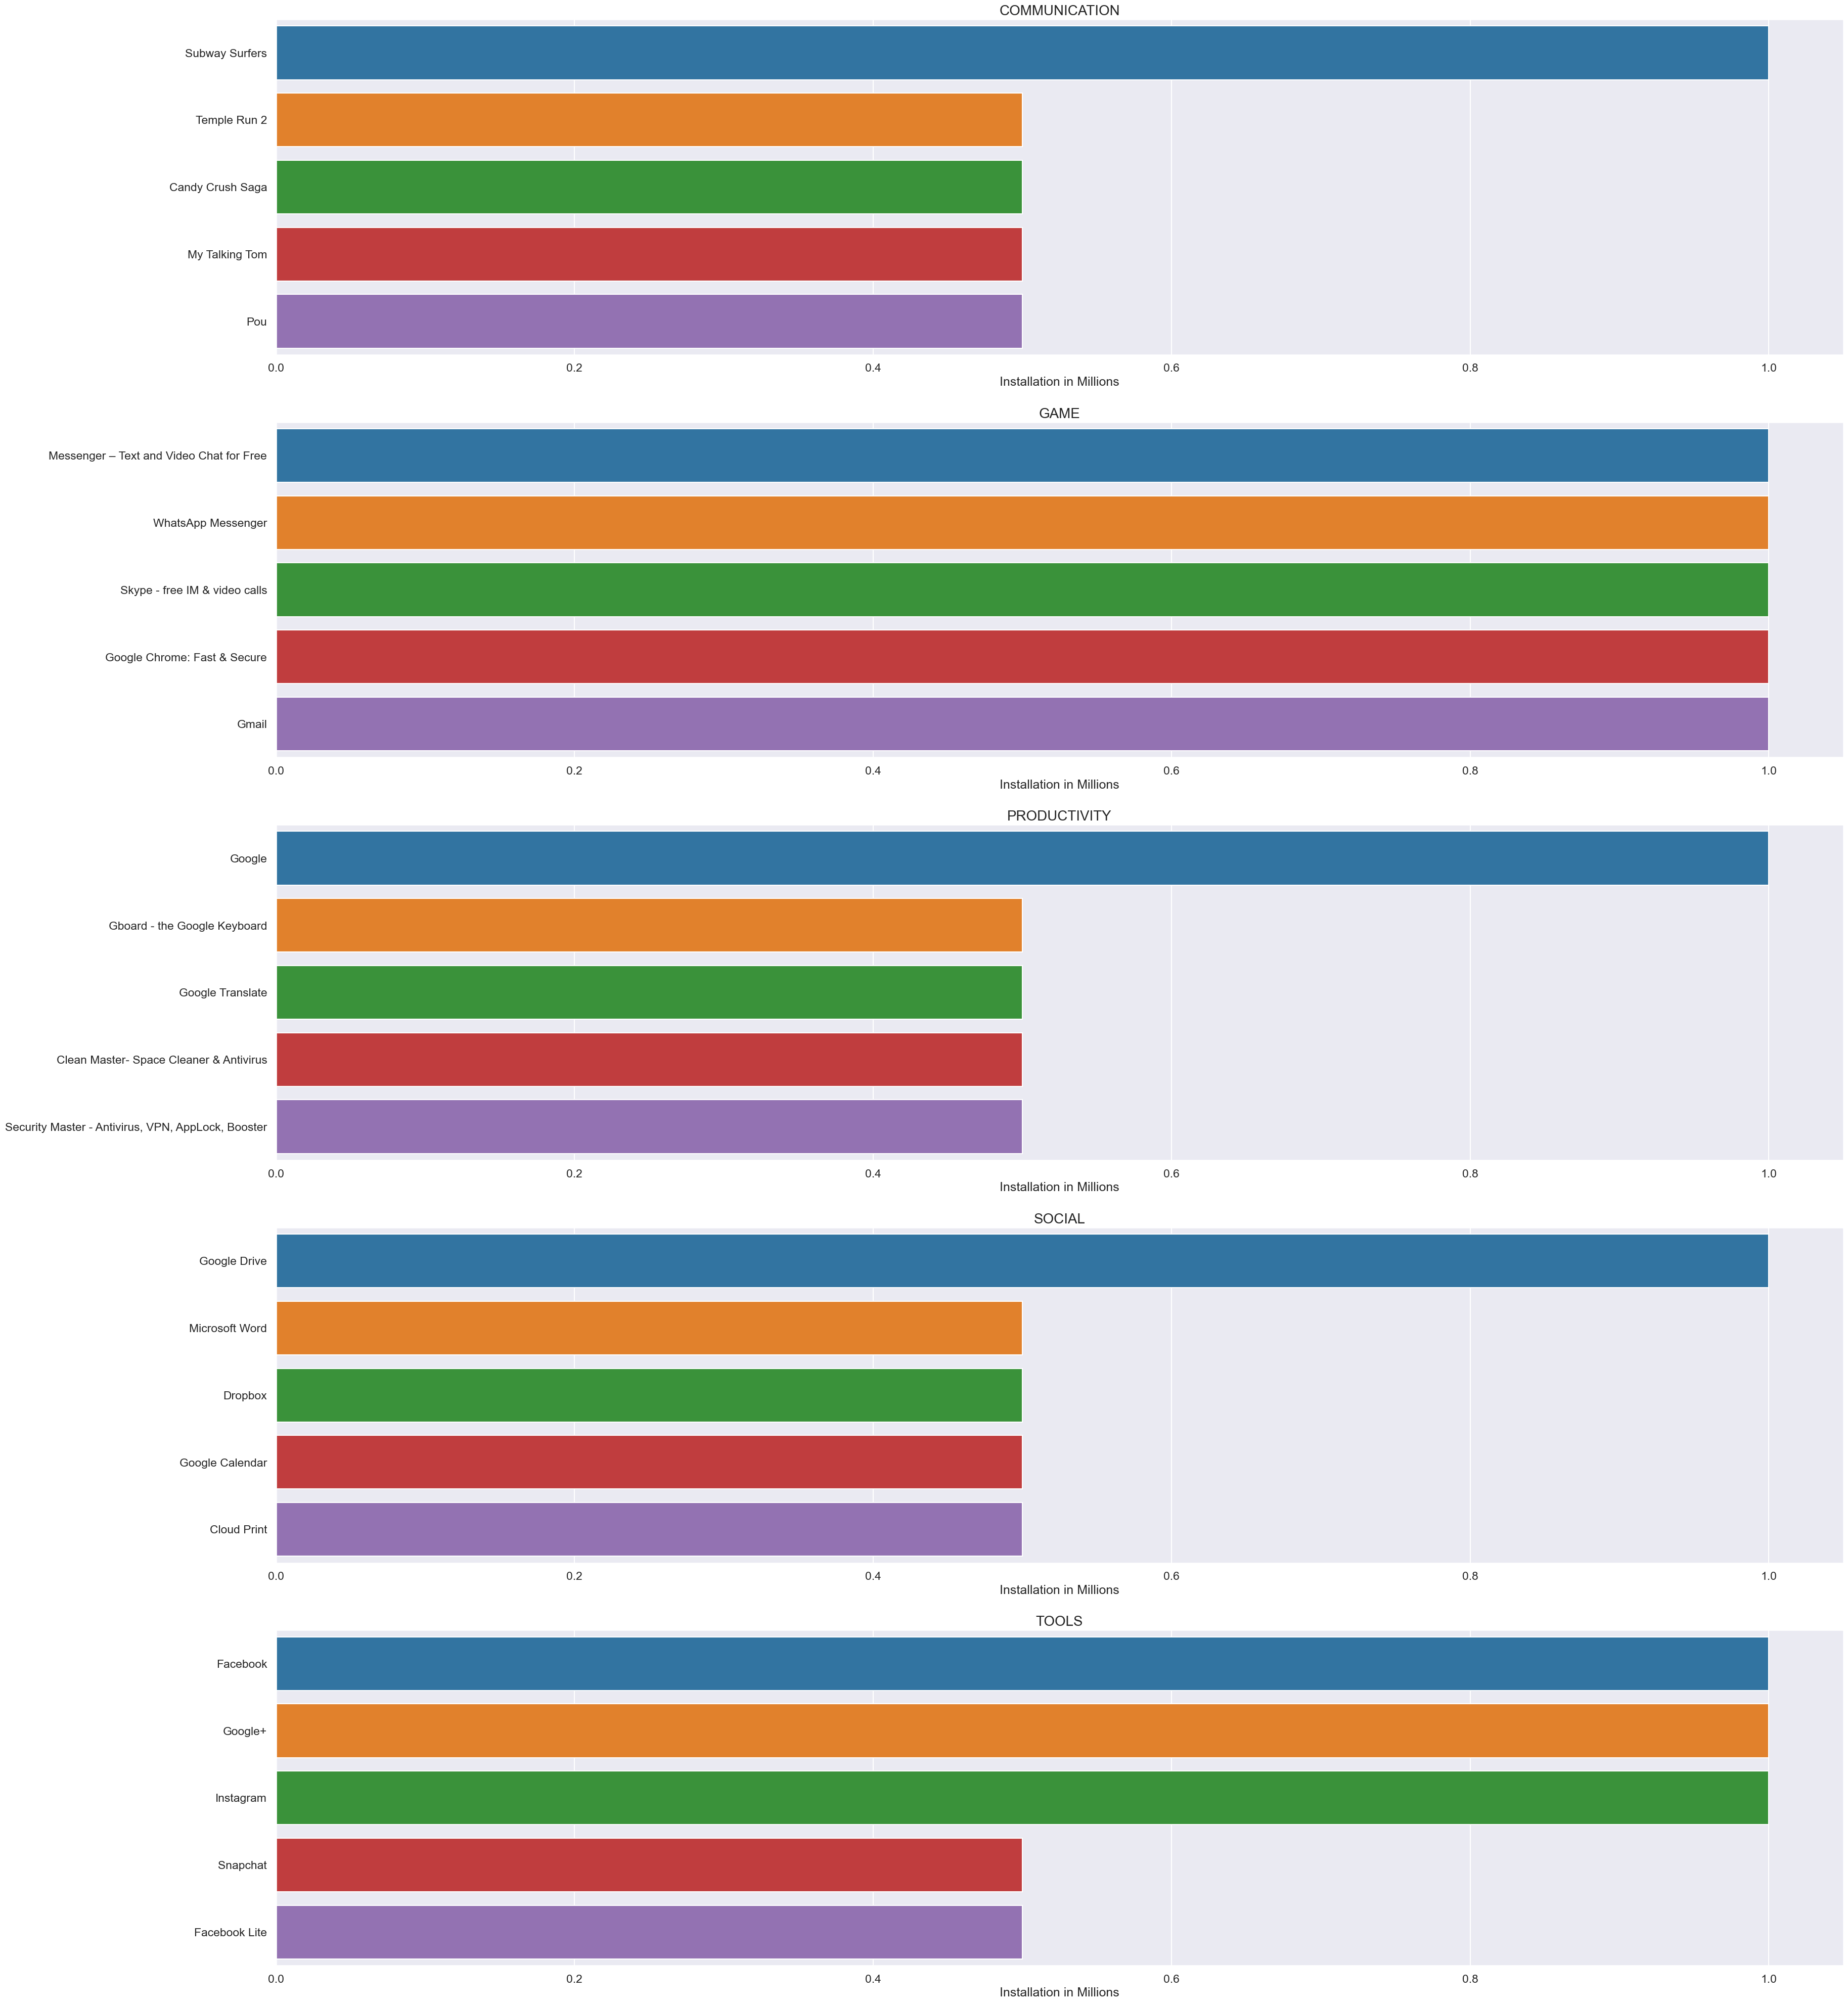

In [143]:
a = 0
plt.figure(figsize=(40,50))

for i in range(len(list(installn['Category'][:5]))):
    dat = app_installn1.loc[app_installn1['Category']== installn['Category'].unique()[i],:]
    plt.subplot(5,1,a+1)
    sns.barplot(data= dat,x= 'Installs' ,y='App', palette= 'tab10' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app_installn1['Category'].unique()[i],size = 20)
    a+=1

## How many apps are there on Google Play Store which get 5 ratings??

In [149]:
df_f[df_f['Rating'] == 5].shape
##271 apps

(271, 16)